**Harsha Somaya**

Spring 2023

CS 251/2: Data Analysis and Visualization

Project 4: Principal Component Analysis

In [6]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pca_cov

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Notes

In your implementations, only the following "high level" `scipy`/`numpy` functions can be used:

- `np.linalg.eig`

**NOTE:** The numpy functions that you have been using so far are fine to use.

## Task 1: Principal component analysis using the covariance matrix

In this task, you will implement principal component analysis (PCA) using the covariance matrix method, test your code, plot the results on the Iris dataset, then run PCA and analyze on several other datasets

### 1a) Import Iris data

- In the below cell, load in the Iris dataset into a pandas DataFrame (note, this version of iris does not have the data type row — going forward, csv files we work with won't have this `type` row).
- Print out the head (only showing the first 5 data samples).
- Create an `PCA_COV` object called `pca` based on the DataFrame object that you just created.

In [7]:
col = ["sepalLength", "sepalWidth", "petalLength", "petalWidth", "species"]
# data = pd.DataFrame(pd.read_csv("data/iris.csv"))

data = np.array(np.genfromtxt('data/iris.csv', skip_header=1,delimiter=','))
iris_data = pd.DataFrame(data, columns=col)

print(iris_data[:5])
pca=pca_cov.PCA_COV(iris_data)



   sepalLength  sepalWidth  petalLength  petalWidth  species
0          5.1         3.5          1.4         0.2      0.0
1          4.9         3.0          1.4         0.2      0.0
2          4.7         3.2          1.3         0.2      0.0
3          4.6         3.1          1.5         0.2      0.0
4          5.0         3.6          1.4         0.2      0.0


Your code should print something that looks like this (with fancier formatting):

    sepalLength	sepalWidth	petalLength	petalWidth	species
    0	5.1	3.5	1.4	0.2	0
    1	4.9	3.0	1.4	0.2	0
    2	4.7	3.2	1.3	0.2	0
    3	4.6	3.1	1.5	0.2	0
    4	5.0	3.6	1.4	0.2	0


### 1b) Implement PCA

Implement and test the following methods necessary to perform PCA in `pca_cov.py`.

- `covariance_matrix`: Computes the covariance matrix of data
- `compute_prop_var`: Computes the proportion variance accounted for by the principal components (PCs).
- `compute_cum_var`: Computes the *cumulative* proportion variance accounted for by the PCs.
- `pca`: Method to perform PCA on the data
- `elbow_plot` (**answer Question 1**)
- `pca_project`: Project the data into PCA space

#### (i) Test `covariance_matrix`

In [8]:
# Test covariance here
np.random.seed(0)
d = np.random.randn(100, 3)
cov_mat = pca.covariance_matrix(d)
print(f'Your covariance matrix has shape {cov_mat.shape} and should be (3, 3)')
print(f'Your covariance matrix is:\n{cov_mat} and should be\n[[ 1.06338 -0.07562  0.11267]\n [-0.07562  0.97412 -0.0222 ]\n [ 0.11267 -0.0222   0.96217]]')

Your covariance matrix has shape (3, 3) and should be (3, 3)
Your covariance matrix is:
[[ 1.06338 -0.07562  0.11267]
 [-0.07562  0.97412 -0.0222 ]
 [ 0.11267 -0.0222   0.96217]] and should be
[[ 1.06338 -0.07562  0.11267]
 [-0.07562  0.97412 -0.0222 ]
 [ 0.11267 -0.0222   0.96217]]


#### (ii) Test `prop_var`

Takes eigenvalues ordered large-to-small and computes the proportion of the total variance account for by the $k^{th}$ principal component.

In [9]:
# Test prop_var here
np.random.seed(0)
test_evals = np.sort(np.random.uniform(size=(10,)))[::-1]
prop_var = pca.compute_prop_var(test_evals)
print(f'Your list is actually a Python list (as it should be)? {isinstance(prop_var, list)}')
print(f'Your proportion variance list length is {len(prop_var)} and should be 10')
print(f'Your proportion variance list begins with\n{prop_var[:2]} and it should be\n[0.15649813681155653, 0.1448232917174111]')

Your list is actually a Python list (as it should be)? True
Your proportion variance list length is 10 and should be 10
Your proportion variance list begins with
[0.15649813681155653, 0.1448232917174111] and it should be
[0.15649813681155653, 0.1448232917174111]


#### (iii) Test `compute_cum_var`

Takes proportion variance for principal components, ordered large-to-small, and computes the cumulative sum (cumulative variance accounted for by the first $k$ principal components).

In [10]:
# Test accum_var here
np.random.seed(0)
test_evals = np.sort(np.random.uniform(size=(10,)))[::-1]
prop_var = pca.compute_prop_var(test_evals)
accum_var = pca.compute_cum_var(prop_var)
print(f'Your list is actually a Python list (as it should be)? {isinstance(accum_var, list)}')
print(f'Your cumulative variance list length is {len(accum_var)} and should be 10')
print(f'Your cumulative variance list begins with\n{accum_var[:2]} and should be\n[0.15649813681155653, 0.3013214285289676]')

Your list is actually a Python list (as it should be)? True
Your cumulative variance list length is 10 and should be 10
Your cumulative variance list begins with
[0.15649813681155653, 0.3013214285289676] and should be
[0.15649813681155653, 0.3013214285289676]


#### (iv) Test `pca`

Performs PCA using the covariance matrix method.

In [11]:
# Test pca (no normalization) here
iris_headers = list(iris_data.columns[:-1])
pca.pca(iris_headers)

# test that instance variable shape are correct
print(f'There are {len(pca.vars)} vars in Iris PCA and there should be 4.')
print(f'The original PCA data has shape {pca.A.shape} and should be (150, 4).')
print(f'Eigenvector shape: {pca.e_vecs.shape} should be (4, 4).\nEigenvalue shape: {pca.e_vals.shape} should be (4,).')
print(f'Length of proportion variance account for: {len(pca.get_prop_var())} should be 4.')
print(f'Length of cumulative proportion variance account for: {len(pca.get_cum_var())} should be 4.')
print()

# Test values
print(f"Your vars in Iris PCA:\n{pca.vars}  and they should be\n['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']")
print(f'Your eigenvectors:\n{pca.e_vecs}. They should be\n[[ 0.36139 -0.65659 -0.58203  0.31549]\n [-0.08452 -0.73016  0.59791 -0.31972].\n [ 0.85667  0.17337  0.07624 -0.47984]\n[ 0.35829  0.07548  0.54583  0.75366]].')
print(f'Your eigenvalues:\n{pca.e_vals}. They should be\n[4.22824 0.24267 0.07821 0.02384]')
print(f'Cumulative proportion variance account for:\n{pca.get_cum_var()}. It should be\n[0.924618723201727, 0.9776852063187949, 0.9947878161267245, 0.9999999999999999] .')



There are 4 vars in Iris PCA and there should be 4.
The original PCA data has shape (150, 4) and should be (150, 4).
Eigenvector shape: (4, 4) should be (4, 4).
Eigenvalue shape: (4,) should be (4,).
Length of proportion variance account for: 4 should be 4.
Length of cumulative proportion variance account for: 4 should be 4.

Your vars in Iris PCA:
['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']  and they should be
['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']
Your eigenvectors:
[[ 0.36139 -0.65659 -0.58203  0.31549]
 [-0.08452 -0.73016  0.59791 -0.31972]
 [ 0.85667  0.17337  0.07624 -0.47984]
 [ 0.35829  0.07548  0.54583  0.75366]]. They should be
[[ 0.36139 -0.65659 -0.58203  0.31549]
 [-0.08452 -0.73016  0.59791 -0.31972].
 [ 0.85667  0.17337  0.07624 -0.47984]
[ 0.35829  0.07548  0.54583  0.75366]].
Your eigenvalues:
[4.22824 0.24267 0.07821 0.02384]. They should be
[4.22824 0.24267 0.07821 0.02384]
Cumulative proportion variance account for:
[0.924618723201

In [12]:
# Test pca (normalization) here
iris_headers = list(iris_data.columns[:-1])
pca.pca(iris_headers, normalize=True)

# test that instance variable shape are correct
print(f'There are {len(pca.vars)} vars in Iris PCA and there should be 4.')
print(f'The original PCA data has shape {pca.A.shape} and should be (150, 4).')
print(f'Eigenvector shape: {pca.e_vecs.shape} should be (4, 4).\nEigenvalue shape: {pca.e_vals.shape} should be (4,).')
print(f'Length of proportion variance account for: {len(pca.get_prop_var())} should be 4.')
print(f'Length of cumulative proportion variance account for: {len(pca.get_cum_var())} should be 4.')
print(f'Data min/max is {pca.A.min()}/{pca.A.max()} should be 0.0/1.0')
print()

# Some test values
print(f'Your eigenvalues:\n{pca.e_vals}. They should be\n[0.23245 0.03247 0.0096  0.00176].')
print(f'Cumulative proportion variance account for:\n{pca.get_cum_var()}. It should be\n[0.8413603821315434, 0.9588784639918418, 0.9936140780797744, 1.0].')

There are 4 vars in Iris PCA and there should be 4.
The original PCA data has shape (150, 4) and should be (150, 4).
Eigenvector shape: (4, 4) should be (4, 4).
Eigenvalue shape: (4,) should be (4,).
Length of proportion variance account for: 4 should be 4.
Length of cumulative proportion variance account for: 4 should be 4.
Data min/max is 0.0/1.0 should be 0.0/1.0

Your eigenvalues:
[0.23245 0.03247 0.0096  0.00176]. They should be
[0.23245 0.03247 0.0096  0.00176].
Cumulative proportion variance account for:
[0.8413603821315433, 0.9588784639918416, 0.9936140780797743, 1.0000000000000002]. It should be
[0.8413603821315434, 0.9588784639918418, 0.9936140780797744, 1.0].


#### (v) Test `elbow_plot`

Visualize the cumulative proportion variance accounted for by the first $k$ principal components.

**Make sure that you have the normalized PCA in memory before proceeding (the last cell of test code above)**

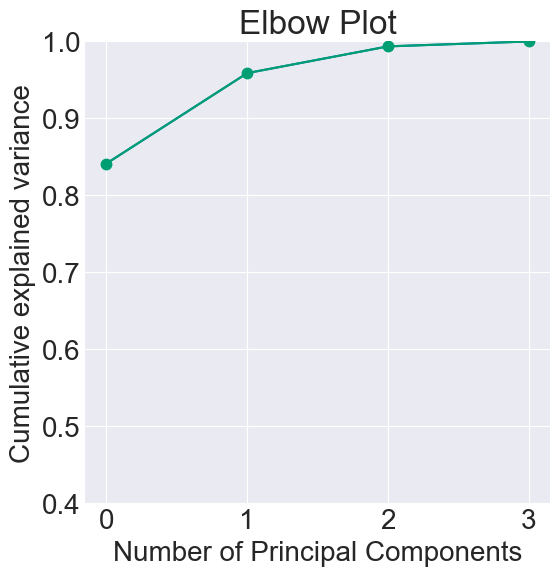

In [13]:
# test elbow plot
pca.elbow_plot()
plt.show()


**Question 1:** Based on the Iris elbow plot, how many principle components would you drop. Why?

**Answer 1:**
I would keep only 2 princiipal compents becuase that explains 100% of the cumulative cariance, so there is no need to have 4. Drop 2, keep 2 

#### (vi) Test `pca_project`

Project the data onto a list of the top $2$ principal components (`pcs_to_keep = [0, 1]`)

In [14]:
num_dims = 2
pcs_to_keep = np.arange(num_dims)
iris_proj = pca.pca_project(pcs_to_keep)
print(iris_proj.shape)

(150, 2)


##### Plot your PCA projected Iris data

- In the cell below, create a scatterplot of your PCA projected data.
- Label the x and y axes appropriately.

If everything goes well, you should see two distinct clusters

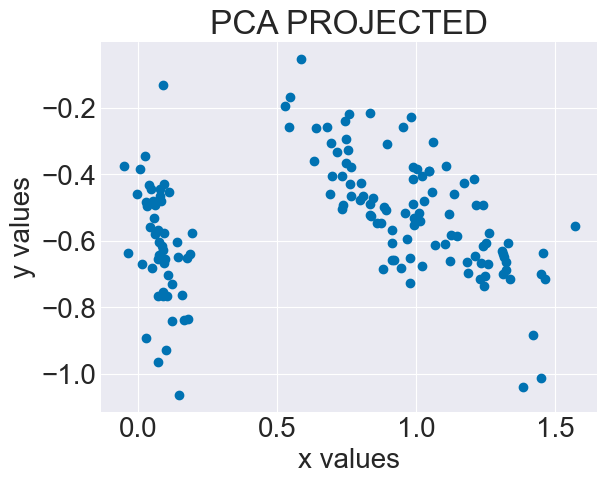

In [15]:
x=iris_proj[:,0]
y=iris_proj[:,1]
plt.ylabel("y values")

plt.xlabel("x values")
plt.scatter(x,y)
plt.title("PCA PROJECTED")
plt.show()

### 1c) Dropping different pairs of principal components

- In the cell below, create a "high quality" 2x2 subplots grid of scatterplots that drops different consective PCs from the data, then project onto the remaining PCs.

The 2x2 plots should keep:
- (top-left) PCs [2, 3]
- (top-right) PCs [1, 2]
- (bottom-left) PCs [3, 0]
- (bottom-right) PCs [0, 1]

High quality means
- x and y axis label indicating the PC (e.g. PC1)
- title indicating the PCs shown in the plot

You may have to adjust the font/figure sizes to make things legiable.


[[0, 1], [1, 2], [2, 3], [3, 0]]


[[2, 3], [1, 2], [3, 0], [0, 1]]
0 0
0 1
he
1 0
1 1
he


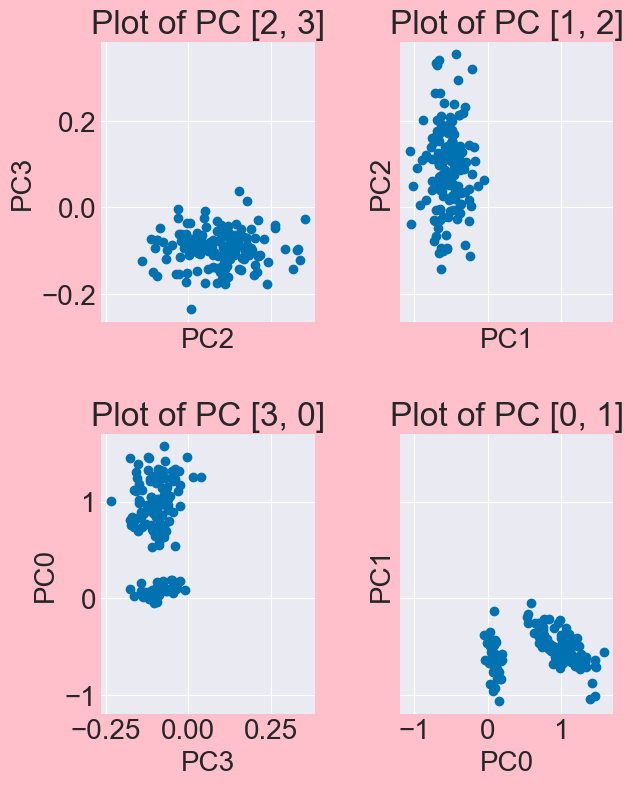

In [ ]:
empty_to_keep=[[]]

for i in range(3): #[0,1,2]
    empty_to_keep.append([i,i+1])
empty_to_keep.append([3,0])
empty_to_keep.pop(0)
# empty_to_keep=empty_to_keep
empty_to_keep[-1], empty_to_keep[0],empty_to_keep[2] = empty_to_keep[0], empty_to_keep[2], empty_to_keep[-1]
print(empty_to_keep)

fig, axes = plt.subplots(2, 2,facecolor="pink")



plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.5,
                    wspace=0.4,
                    hspace=0.4)

iris_proj = pca.pca_project(pcs_to_keep)
xindex=0
yindex=0
for listpair in empty_to_keep:
    A_projec=pca.pca_project(listpair)
    x=A_projec[:,0]
    y=A_projec[:,1]
    # print(listpair)
    print(xindex,yindex)
    axes[xindex,yindex].scatter(x,y)
    axes[xindex, yindex].set_title("Plot of PC "+ f'{listpair}')
    axes[xindex, yindex].set_ylabel("PC"+f'{listpair[1]}')
    axes[xindex, yindex].set_xlabel("PC"+f'{listpair[0]}')
    yindex+=1
    if yindex == 2:
        print("he")
        yindex=0
        xindex+=1


plt.show()

**Question 2:** Interpret what the 2x2 grid of plots tells us about keeping different PCs.


**Answer 2:**
eighen values: [0.23245 0.03247 0.0096  0.00176]. 

Take two extreme cases: 
1. When the top two PCs are used, the most important, then most of the data follows into identifable clusters. For example, in the bottom right graph, most of the data is near 0 of PC0, or in other words it is near the tail of this PC. For the other cluster, they are more spread put but still relatively in teh same vincity of the of being i teh x value for PC0 and stretched out alound PC1. 
2. When the two most unimportant PCs are used in the top left graph, the data does not seem to follow any pattern and is noisy since these PCs keep unimportant aspects of the data.


every entry in eigen vector is weight 




### 1e) Reconstruct data based on PCs

- In `pca_cov.py`, implement `pca_then_project_back`, which projects the data to PCA space, keeping only the top $k$ PCs, then projects from PCA space back onto the original data space.
- In the cell below, create a scatter plot of the two data variables `sepalLength` (x), `sepalWidth` (y) of the Iris data **without any normalization**.
- In the 2nd cell below, do PCA **on the normalized Iris data** and create a 2x2 grid of scatter plots showing the data reconstruction of the 1st two data variables (`sepalLength`, `sepalWidth` — *these are what your axis labels should be*) when keeping the top 1, 2, 3, or 4 (all) principal components.
    - If everything goes well, if you keep all 4 PCs you should get the original dataset back (it should match your 'sepalLength', 'sepalWidth' plot created one cell above — including the data range and center).

Text(0.5, 1.0, 'sepalWidth vs. sepalLength ')

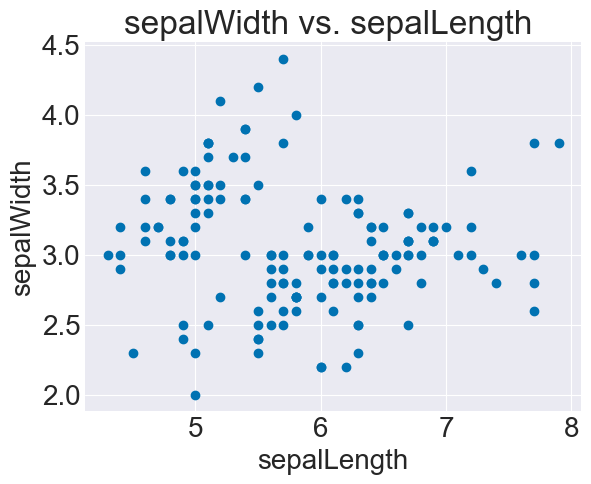

In [17]:
plt.scatter(data[:,0], data[:,1])
plt.xlabel("sepalLength")
plt.ylabel("sepalWidth")
plt.title("sepalWidth vs. sepalLength ")



pca put horizonatlly and orthogal to y axis (x and y axis orthogal) and then plotted points. See wikipedia. Put PCA horizontally.


But in orginal space PCA is diagonal, now grpahing in orginal space 

In [18]:
print(pca.get_eigenvectors()[:,:4])
print(pca.get_eigenvectors()[:,:3+1].T)


[[ 0.42494 -0.4232  -0.71357  0.36213]
 [-0.15075 -0.90397  0.33632 -0.21682]
 [ 0.61627  0.06038 -0.0659  -0.78245]
 [ 0.64569  0.00984  0.61103  0.45785]]
[[ 0.42494 -0.15075  0.61627  0.64569]
 [-0.4232  -0.90397  0.06038  0.00984]
 [-0.71357  0.33632 -0.0659   0.61103]
 [ 0.36213 -0.21682 -0.78245  0.45785]]


centered_data.shape  (150, 4)
self.get_eigenvectors() shape  (4, 4)
[0]
(150, 1)
[[ 0.42494 -0.15075  0.61627  0.64569]]
0 0
centered_data.shape  (150, 4)
self.get_eigenvectors() shape  (4, 4)
[0, 1]
(150, 2)
[[ 0.42494 -0.15075  0.61627  0.64569]
 [-0.4232  -0.90397  0.06038  0.00984]]
0 1
he
centered_data.shape  (150, 4)
self.get_eigenvectors() shape  (4, 4)
[0, 1, 2]
(150, 3)
[[ 0.42494 -0.15075  0.61627  0.64569]
 [-0.4232  -0.90397  0.06038  0.00984]
 [-0.71357  0.33632 -0.0659   0.61103]]
1 0
centered_data.shape  (150, 4)
self.get_eigenvectors() shape  (4, 4)
[0, 1, 2, 3]
(150, 4)
[[ 0.42494 -0.15075  0.61627  0.64569]
 [-0.4232  -0.90397  0.06038  0.00984]
 [-0.71357  0.33632 -0.0659   0.61103]
 [ 0.36213 -0.21682 -0.78245  0.45785]]
1 1
he


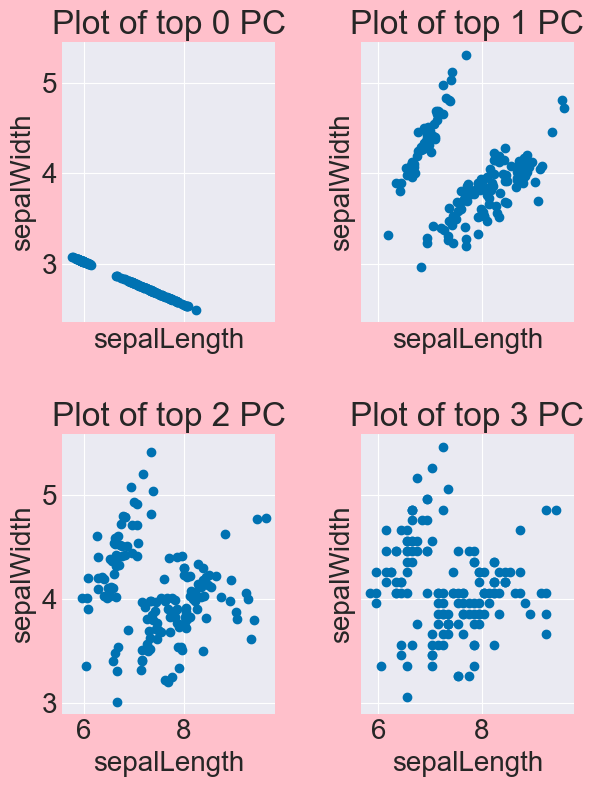

In [19]:
# 2x2 grid of scatter plots

fig, axes = plt.subplots(2, 2, sharex='col', sharey='row',facecolor="pink")



plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.5,
                    wspace=0.4,
                    hspace=0.4)

xindex=0
yindex=0
for i in range(4):
    projected_back=pca.pca_then_project_back(i)
    x=projected_back[:,0]
    y=projected_back[:,1]
    # print(listpair)
    print(xindex,yindex)
    axes[xindex,yindex].scatter(x,y)
    axes[xindex, yindex].set_title("Plot of top "+ f'{i} '+"PC")
    axes[xindex, yindex].set_xlabel("sepalLength")
    axes[xindex, yindex].set_ylabel("sepalWidth")
    yindex+=1
    if yindex == 2:
        print("he")
        yindex=0
        xindex+=1


plt.show()

**Question 3:** How well does each of the re-projections preserve properties of the original data? Briefly interpret what the above 2x2 grid means.


**Answer 3:**
The last grpah keeps all 4 of the PCs which completely reconstruct the data and shows as if the orginal data was graphed. The first graph keeps only 1 PC so the data has no choice but to fall comepletley onto this diagnoal PC. As more PCs are added, the projection is better. 


## Task 2: Eigenfaces. Perform PCA on face images

Here, you will implement the Eigenface algorithm, which involves performing PCA on images of human faces. Here is a link to original paper: https://sites.cs.ucsb.edu/~mturk/Papers/jcn.pdf

*Reference:* M. Turk; A. Pentland (1991). "Eigenfaces for recognition" (PDF). *Journal of Cognitive Neuroscience*. 3 (1): 71–86.

### 2a) Load in LFWcrop face dataset

Run the following cell to load in the face images and labels (which celebrity each face is of).

More info about LFWcrop face dataset: http://conradsanderson.id.au/lfwcrop/

In [20]:
face_imgs = np.load('data/lfwcrop.npy')
with open('data/lfwcrop_ids.txt') as fp:
    face_names = fp.read().splitlines()

print(f'There are {len(face_imgs)} faces. There should be 13231.')
print(f'Shape of images is are {face_imgs.shape} faces. It should be (13231, 64, 64).')
print(f'Names of faces match the number of face images? {np.all(len(face_names) == len(face_imgs))}')

There are 13231 faces. There should be 13231.
Shape of images is are (13231, 64, 64) faces. It should be (13231, 64, 64).
Names of faces match the number of face images? True


### 2b) Look at the face data

- In the cell below, fill in the function to create a 5x5 subplots grid of plots. In each plot, show one of the first 25 images in the dataset. For the title of the plot, use the corresponding name of the celebrity whose face. For showing the image, use `imshow`: https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib-pyplot-imshow
- Run the function to create the plot of the faces below.
- When you call `imshow`, add this optional parameter (otherwise faces look ghastly): `cmap=plt.get_cmap('gray')`
- Turn off the x and y ticks (they just add clutter).
- **Before moving on, make sure that the celebrity names match the image!**

In [21]:
def face_plot(face_imgs, face_names):
    '''Create a 5x5 grid of face images
    
    Parameters:
    -----------
    face_imgs: ndarray. shape=(N, img_y, img_x).
        Grayscale images to show.
    face_names: ndarray. shape=(N,).
        Names of the person in each image represented as strings.
    
    TODO:
    - Create a 5x5 grid of plots of a legible size
    - In each plot, show the grayscale image and make the title the person's name.
    '''
    # 2x2 grid of scatter plots

    fig, axes = plt.subplots(5, 5, sharex='col', sharey='row',facecolor="pink",figsize=(12,12))
    # fontdict={'fontsize':15}
    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=1.3,
                        wspace=0.4,
                        hspace=0.4)

    n=0
    for i in range(5):
        for j in range(5):
            axes[i, j].imshow(face_imgs[n], cmap=plt.get_cmap('gray'))
            axes[i, j].set_title(face_names[n], fontdict={'fontsize':15})
            axes[i, j].set_xticks([])
            axes[i, j].set_yticks([])
            n+=1   
    plt.show()
        



In [22]:
face_plot(face_imgs, face_names)


### 2c) Visualize the "mean face"

- Take the mean face image across the dataset and show it below.

NOTE: Use the same `cmap` parameter as above and turn off x and y tick marks.

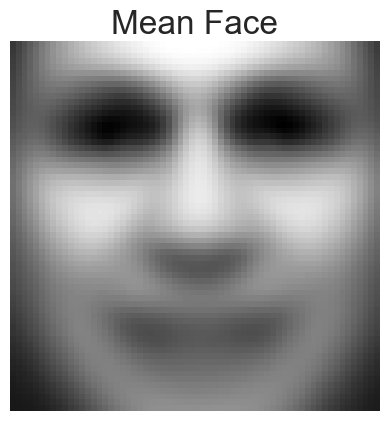

In [23]:
plt.imshow(np.mean(face_imgs, axis = 0), cmap=plt.get_cmap('gray'))
plt.title('Mean Face')
plt.imshow(np.mean(face_imgs, axis = 0), cmap=plt.get_cmap('gray'))
plt.title('Mean Face')
plt.xticks([], [])
plt.yticks([], [])
plt.show()
plt.show()

**Question 4:** What does the "mean face" image represent?

**Answer 4:**
mean of every feature/every pixel

go to column 0, get one number mean, this is mean of pixel 0 in the upper left 

go to column 1, get one number mean form all the rows/images, this is mean color of pizel 1 (the one to the right of pixel 0)

Since evryone has a darker areas for the eyes and mouth at those pixels following a pattern, we see this in the mean face

### 4d) Preprocess face data

In the face dataset, each person is a sample and each pixel is a variable. Currently, the face data has shape = `(13231, 64, 64)` or $N = 13231$ samples and $M = 64*64 = 4096$ pixels. To run PCA, we'll need to \"unravel\" each row of pixels and glue them into one big vector so that the shape = `(13231, 64*64)` = `(13231, 4096)`. This will make a standard matrix and should work with your PCA code.


- Reshape the face data to make this so. **Do NOT hard code ANY part of the (13231, 64*64)!**

In [24]:
# Your reshape code here
face_imgs_vec=face_imgs.reshape((13231,4096))

print(f'Your reshaped face images have shape={face_imgs_vec.shape} and it should be (13231, 4096).')

Your reshaped face images have shape=(13231, 4096) and it should be (13231, 4096).


### 2e) Perform PCA on preprocessed face data

- Create pandas DataFrame object that holds the face data. The header names of consecutive integers `0, 1, ..., 4095` are fine.
- Create `PCA_COV` object that holds the face DataFrame.
- Run PCA. For `vars` pass in a Python list of ints (`0, 1, ..., 4095`).

NOTE: This is not a "toy" dataset so it might take a few minutes to finish computing.
- Use the python `time` module (i.e. `import time`) to time how long the `pca` method takes to finish processing the data, then print out the time elapsed below. If this takes more than a few minutes, something probably is wrong.

In [25]:
import time as t
col=[]
for i in range(4096):
    col.append(i)



image_data = pd.DataFrame(face_imgs_vec)

print(image_data[:5])
pca2=pca_cov.PCA_COV(image_data)
start=t.time()
pca2.pca(col)
print("time is "+str(t.time()-start)+" seconds")


    0      1      2      3      4      5      6      7      8      9     ...  \
0  177.0  180.0  185.0  189.0  191.0  188.0  183.0  181.0  181.0  179.0  ...   
1  143.0  138.0  140.0  149.0  171.0  182.0  177.0  177.0  186.0  193.0  ...   
2   47.0   47.0   54.0   59.0   65.0   72.0   77.0   80.0   87.0   97.0  ...   
3  123.0  122.0  123.0  124.0  121.0  115.0  113.0  113.0  112.0  112.0  ...   
4   85.0   99.0  108.0  108.0  105.0  106.0  115.0  130.0  138.0  139.0  ...   

    4086   4087   4088   4089   4090   4091   4092   4093   4094  4095  
0  146.0  150.0  135.0  115.0   95.0   84.0   88.0   91.0   88.0  89.0  
1  139.0  118.0   66.0   14.0   10.0   20.0   17.0   13.0   16.0  19.0  
2  120.0  113.0  112.0  111.0  110.0  109.0  107.0  105.0  102.0  98.0  
3   66.0   67.0   63.0   62.0   60.0   63.0   66.0   59.0   44.0  37.0  
4   91.0  103.0  147.0  128.0  123.0  119.0  111.0  109.0  103.0  99.0  

[5 rows x 4096 columns]
time is 54.910865783691406 seconds


### 2f) Make face PCA elbow plot

- Make an elbow plot of the PCA results.
- You should readily notice that it is challenging to see how many PCs are required before the curve plateaus. Update your plot below with a reasonable number of PCs to show in order to focus on the curve before it plateaus.

In [27]:
pca2.get_eigenvectors().shape[1]+10

4106

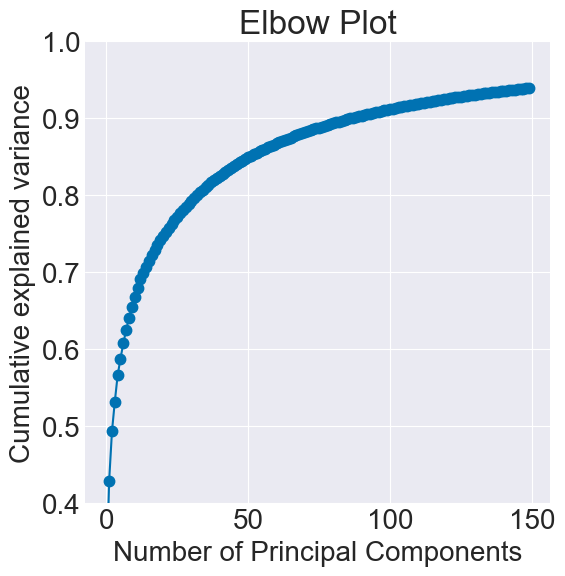

In [28]:
pca2.elbow_plot(150)
plt.show()




### 2g) Reconstruct faces using the principal components

Use your elbow plot to find the number of top principal components required to *approximately* explain the following cumulative proportion of the variance:
- 50%
- 70%
- 80%
- 95%


- For each of the above number of PCs, project them back onto the original data space.
- Write then use the below `make_imgs` function to convert the projected data back to image shapes `(13231, 64, 64)`.
- Use `face_plot` to plot the reconstructed faces for each of the variance numbers above.

**There should be 4 5x5 plots below**

In [29]:
def make_imgs(reconstucted_imgs):
    '''Inflates a 1D feature vector representation of images into 2D images for plotting.
    Assumes square images
    
    Parameters:
    -----------
    reconstucted_imgs: ndarray. shape=(N, img_y*img_x)
        1D vector representation of each image
    
    Returns:
    -----------
    ndarray. shape=(N, img_y, img_x)
        The images inflated into 2D
    '''
    return reconstucted_imgs.reshape(13231,64,64)

#### 50% variance face grid

centered_data.shape  (13231, 4096)
self.get_eigenvectors() shape  (4096, 4096)
[0, 1, 2, 3, 4, 5]
(13231, 6)
[[-0.00979 -0.01035 -0.01081 ... -0.00703 -0.00633 -0.00567]
 [ 0.02191  0.02246  0.02267 ... -0.02089 -0.01989 -0.01887]
 [ 0.02269  0.02138  0.0196  ...  0.03738  0.03771  0.03786]
 [-0.03102 -0.03382 -0.03638 ...  0.00054  0.00045  0.00034]
 [-0.00054 -0.00176 -0.0033  ... -0.04111 -0.03996 -0.03832]
 [-0.01657 -0.01569 -0.01459 ...  0.02114  0.02076  0.01954]]


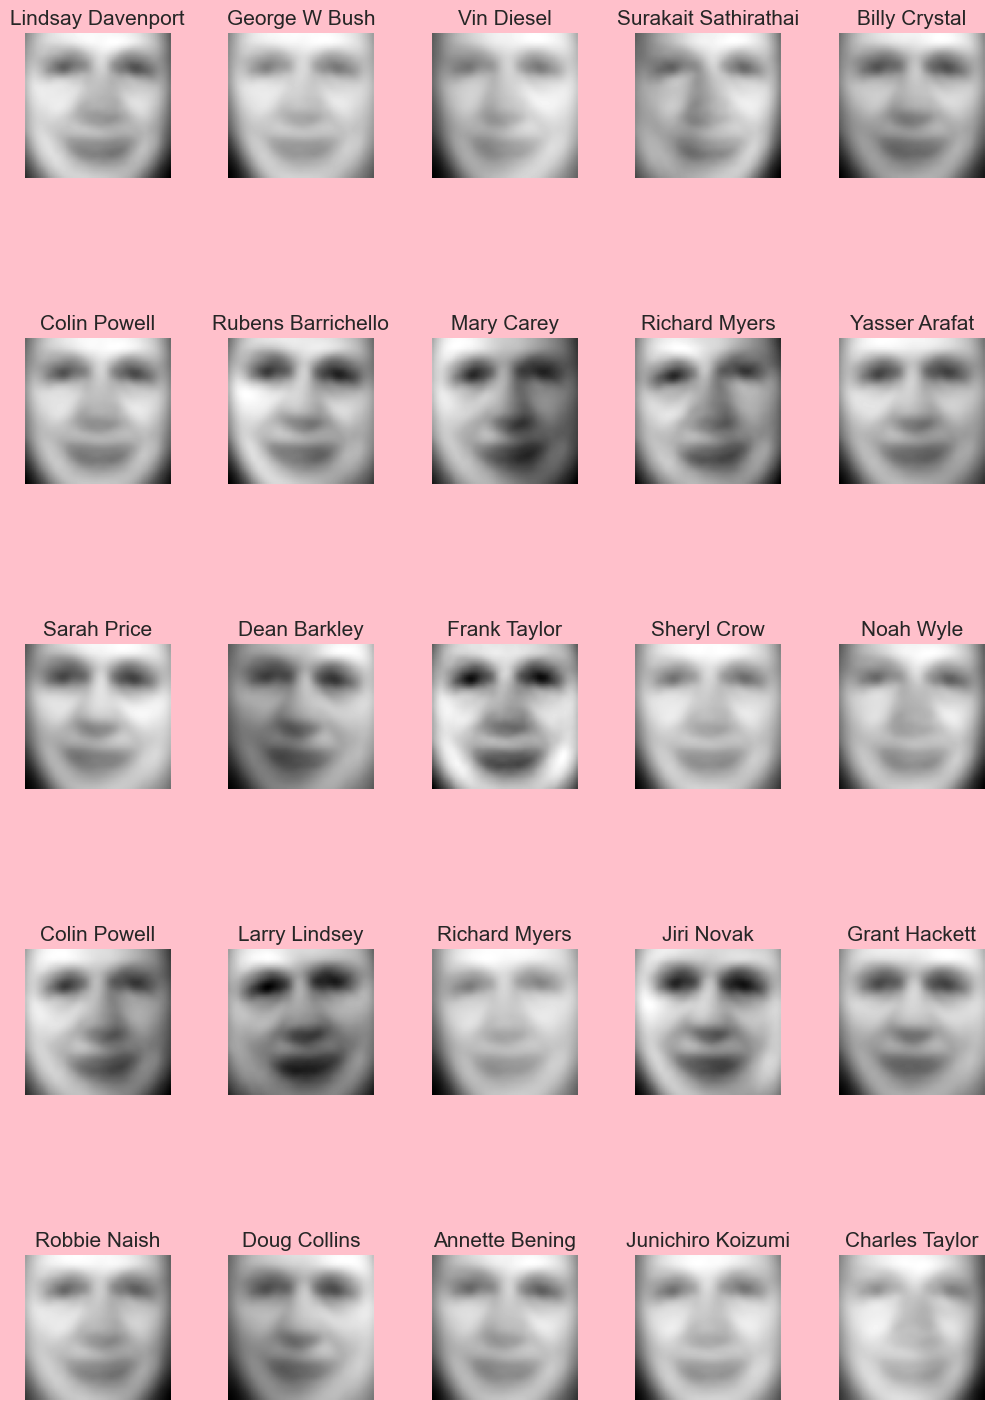

In [30]:
projected_back=pca2.pca_then_project_back(top_k=5)
reconstructed=make_imgs(projected_back)
face_plot(reconstructed, face_names)

#### 70% variance face grid

centered_data.shape  (13231, 4096)
self.get_eigenvectors() shape  (4096, 4096)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
(13231, 17)
[[-0.00979 -0.01035 -0.01081 ... -0.00703 -0.00633 -0.00567]
 [ 0.02191  0.02246  0.02267 ... -0.02089 -0.01989 -0.01887]
 [ 0.02269  0.02138  0.0196  ...  0.03738  0.03771  0.03786]
 ...
 [ 0.0245   0.02591  0.02653 ... -0.04938 -0.04983 -0.04741]
 [ 0.00496  0.00274 -0.00055 ... -0.01387 -0.01507 -0.01603]
 [ 0.01372  0.01149  0.00914 ...  0.04219  0.03959  0.03631]]


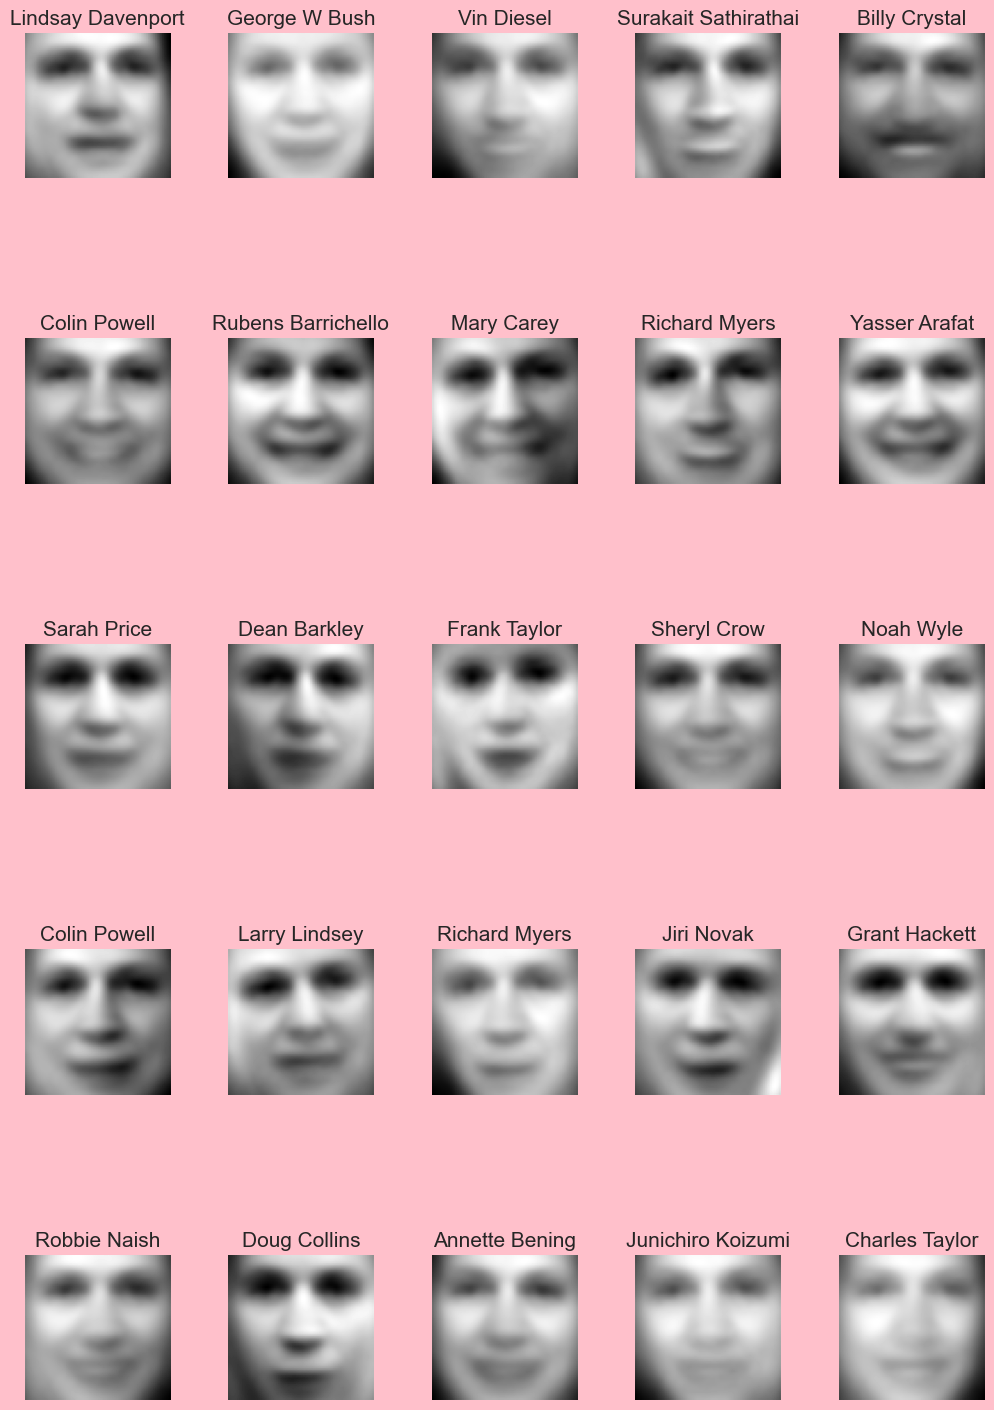

In [ ]:
projected_back=pca2.pca_then_project_back(top_k=16)
reconstructed=make_imgs(projected_back)
face_plot(reconstructed, face_names)

#### 80% variance face grid

centered_data.shape  (13231, 4096)
self.get_eigenvectors() shape  (4096, 4096)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
(13231, 31)
[[-0.00979 -0.01035 -0.01081 ... -0.00703 -0.00633 -0.00567]
 [ 0.02191  0.02246  0.02267 ... -0.02089 -0.01989 -0.01887]
 [ 0.02269  0.02138  0.0196  ...  0.03738  0.03771  0.03786]
 ...
 [-0.0258  -0.0243  -0.01994 ...  0.04864  0.0495   0.04654]
 [ 0.03422  0.03323  0.03068 ... -0.00643 -0.0036  -0.00057]
 [-0.00474 -0.00544 -0.00808 ... -0.00188 -0.00698 -0.01154]]


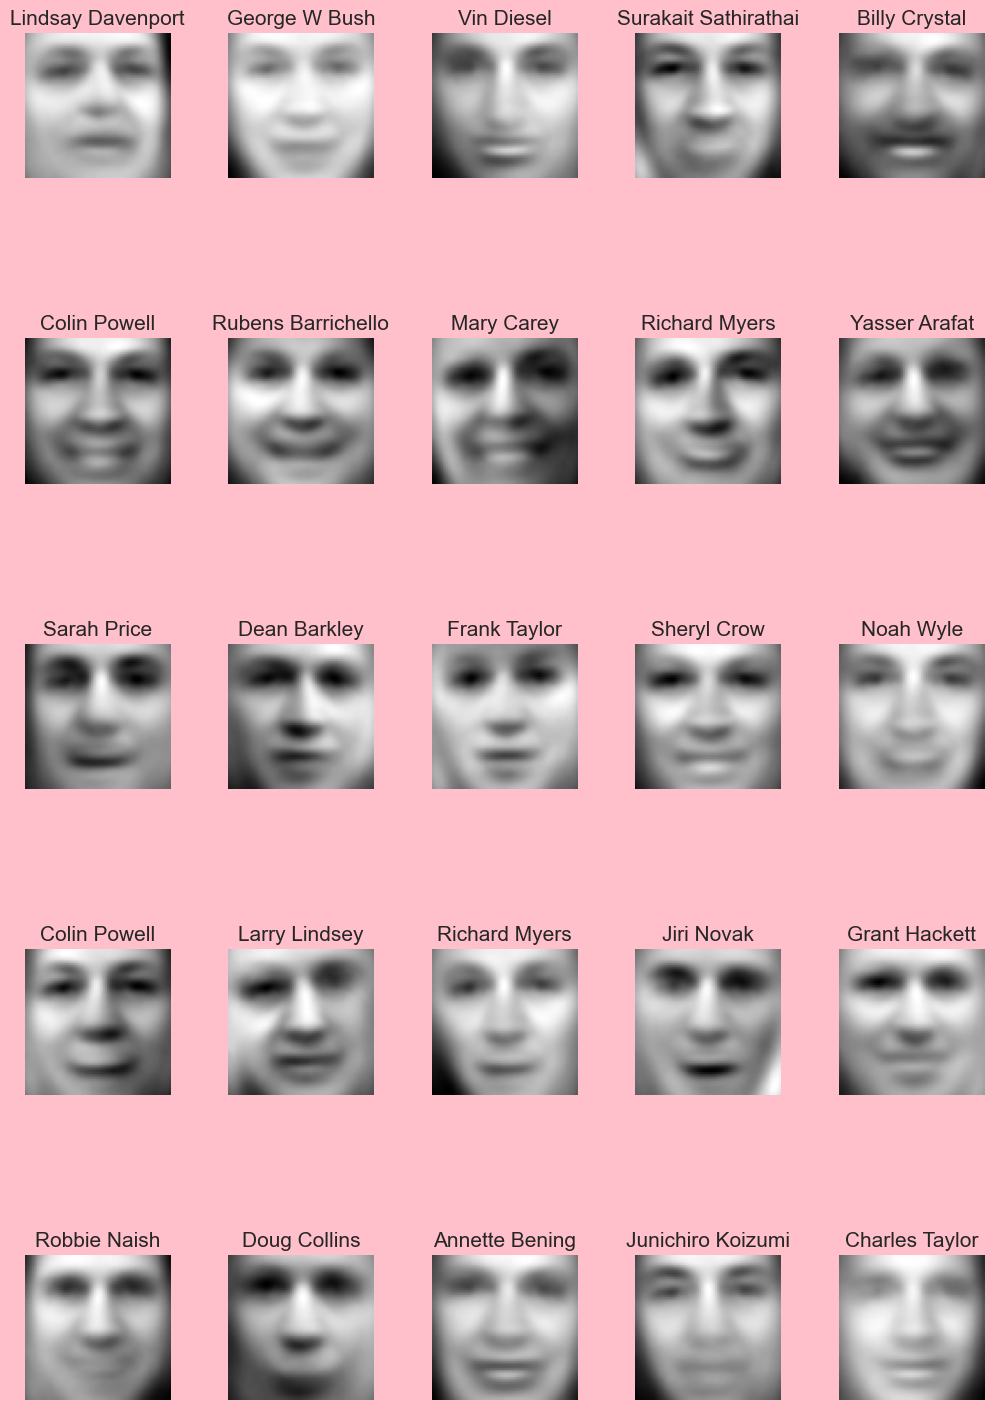

In [ ]:
projected_back=pca2.pca_then_project_back(top_k=30)
reconstructed=make_imgs(projected_back)
face_plot(reconstructed, face_names)

#### 95% variance face grid

centered_data.shape  (13231, 4096)
self.get_eigenvectors() shape  (4096, 4096)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150]
(13231, 151)
[[-0.00979 -0.01035 -0.01081 ... -0.00703 -0.00633 -0.00567]
 [ 0.02191  0.02246  0.02267 ... -0.02089 -0.01989 -0.01887]
 [ 0.02269  0.02138  0.0196  ...  0.03738  0.03771  0.03786]
 ...
 [ 0.03862  0.03269  0.01933 ...  0.01331  0.0242   0.03154]
 [ 0.02039  0

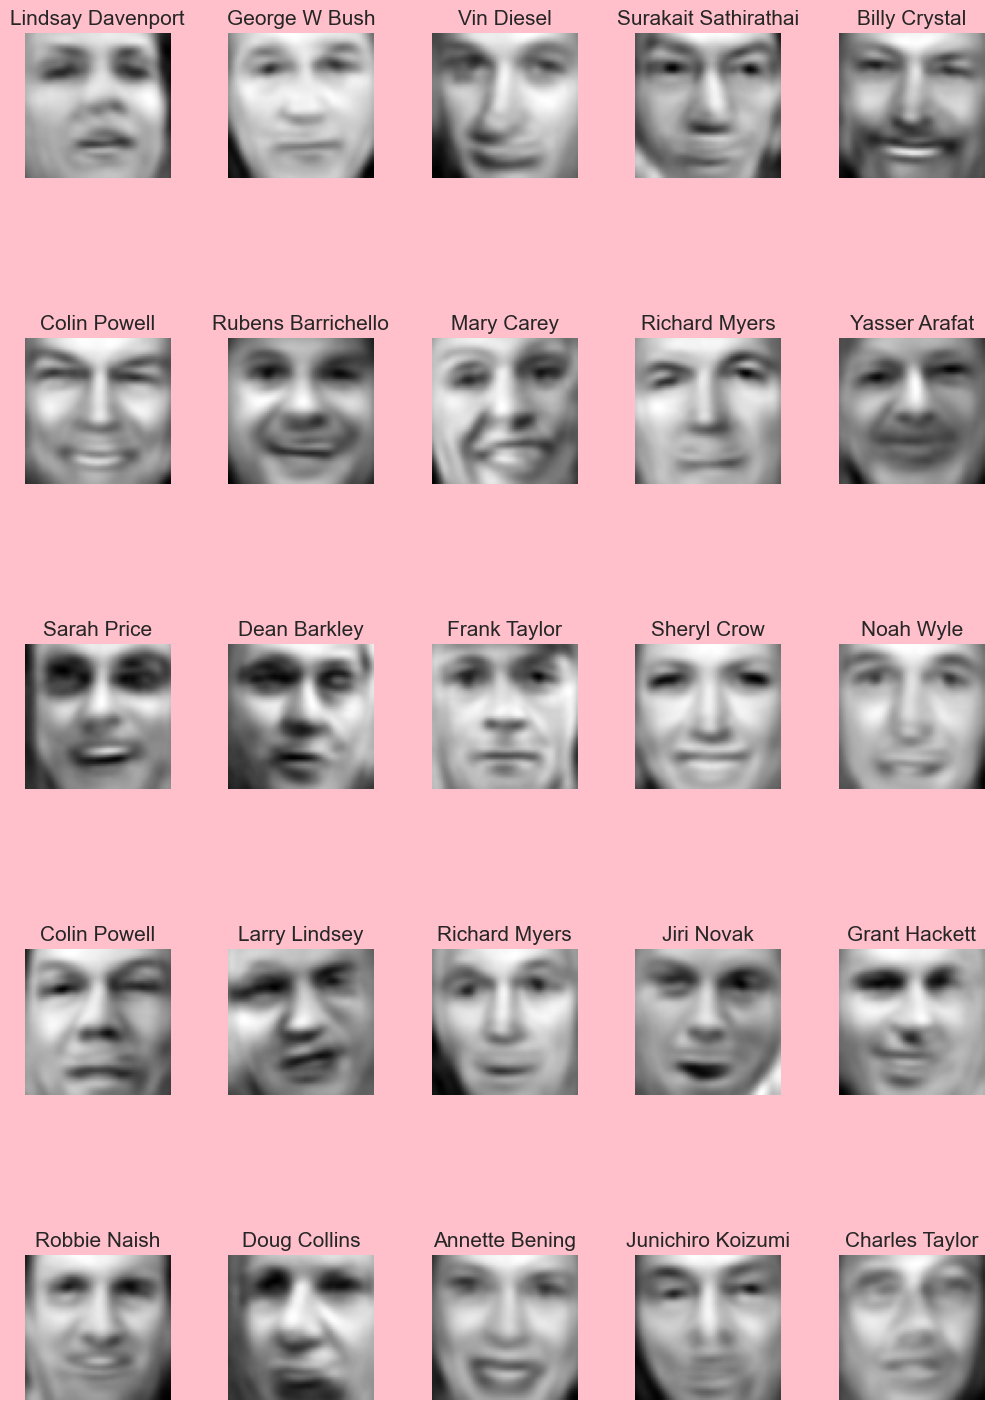

In [ ]:
projected_back=pca2.pca_then_project_back(top_k=150)
reconstructed=make_imgs(projected_back)
face_plot(reconstructed, face_names)

**Question 5:** Briefly interpret the face reconstruction with the above choices of proportion variance explained.

**Answer 5:**


As more PCs (or more specifically their associated proprtional variances) are kept (leading to a higher cumulative varince) more of the entireity  of the orginal data of the pixels of every image is included, so the reconstruction is better as seen with increasing resemblence to the original

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

**Reminder:** Give credit to all sources, including anyone that you consulted.

**Note about CSV files:** Please try if at all possible to use pandas `read_csv` method with the URL argument in your submitted notebook extensions (should be possible if you downloaded your CSV file off the internet). This way, graders will be able to download the same data and you won't have to remember to copy over the CSV file with your project submission (this is welcome too). Remember the 10MB rule though for filer submissions.

### 1. Your own dataset

- Do PCA on a dataset of your choice. Use any of the canonical analysis tools (e.g. elbow plot, proportion variance explained, etc) to inform your analysis and exploration. 

### 2. Image compression

- Run PCA on your own images and analyze the trade-off in compression and reconstruction error.

### 3. Facial recognition with Eigenfaces

You can use Eigenfaces to perform facial recognition! Here is the idea:

1. Perform PCA on images of faces of people who you would like to be able to "learn" to recognize (creating a "database" of known faces). This is just like what you did in the main project.
2. Project a "query" image of a face that you would like to recognize into the PCA space established by the database of known faces (the number of PCA dimensions is up to you).  
3. Project each of the images in the face database into the same PCA space established by the database of known faces (the number of PCA dimensions is the same as before).
4. Treat the projected query image and each projected database images as vectors. Compute the Euclidean distance of the vector obtained by subtracting that of the query image and that of each database image.
5. Pick a match tolerance level. If any of the distances is less than your tolerance level, you have a match! If none of the distances is smaller than your tolerance, you don't have a match.